In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from scipy.integrate import odeint
from scipy.special import jn # bessel function

tf.config.run_functions_eagerly(True)

plt.style.use('grayscale')

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

2022-02-15 03:33:44.486089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-15 03:33:44.486105: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = pd.read_csv('../sat-stuff/local/G01.csv', sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2016 non-null   int64  
 1   0           2016 non-null   float64
 2   1           2016 non-null   float64
 3   2           2016 non-null   float64
 4   3           2016 non-null   float64
 5   4           2016 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 94.6 KB


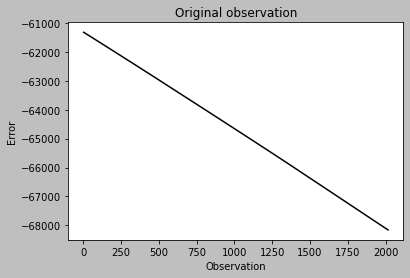

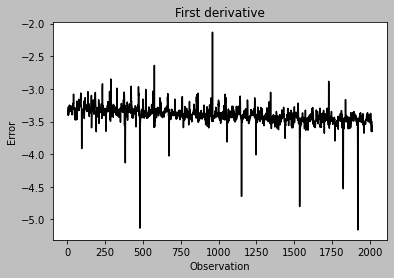

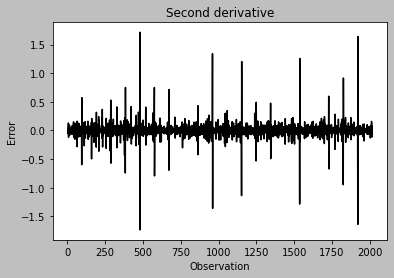

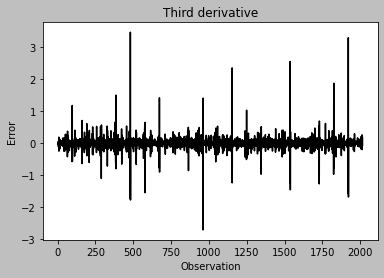

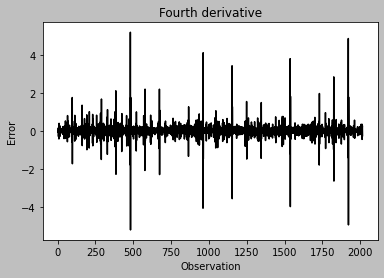

In [3]:
plt.plot(data['0'][4:])
plt.xlabel('Observation')
plt.ylabel('Error')
plt.title('Original observation')
plt.show()

plt.plot(data['1'][4:])
plt.xlabel('Observation')
plt.ylabel('Error')
plt.title('First derivative')
plt.show()

plt.xlabel('Observation')
plt.ylabel('Error')
plt.title('Second derivative')
plt.plot(data['2'][4:])
plt.show()

plt.xlabel('Observation')
plt.ylabel('Error')
plt.title('Third derivative')
plt.plot(data['3'][4:])
plt.show()

plt.xlabel('Observation')
plt.ylabel('Error')
plt.title('Fourth derivative')
plt.plot(data['4'][4:])
plt.show()

No handles with labels found to put in legend.


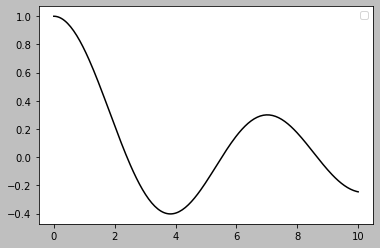

/home/regule/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
No handles with labels found to put in legend.


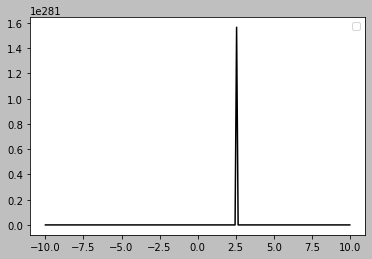

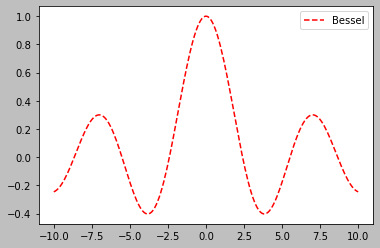

In [4]:

def fbessel(Y, x):
    nu = 0.0
    y = Y[0]
    z = Y[1]
  
    dydx = z
    dzdx = 1.0 / x**2 * (-x * z - (x**2 - nu**2) * y)
    return [dydx, dzdx]

x0 = 1e-15
y0 = 1
z0 = 0
Y0 = [y0, z0]

xspan = np.linspace(1e-15, 10, num=200)
sol = odeint(fbessel, Y0, xspan)

plt.plot(xspan, sol[:,0])
plt.legend()
plt.show()
#plt.savefig('images/bessel.png')

xspan = np.linspace(-10, 10, num=200)
sol = odeint(fbessel, Y0, xspan)

plt.plot(xspan, sol[:,0])
plt.legend()
plt.show()

xspan = np.linspace(-10, 10, num=200)
plt.plot(xspan, jn(0, xspan), 'r--', label='Bessel')
plt.legend()


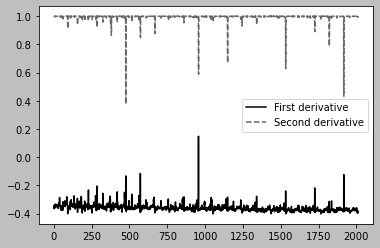

In [5]:
xspan = range(0,data['1'][4:].shape[0])
plt.plot(xspan, jn(0, data['1'][4:]), '-', label='First derivative')
plt.plot(xspan, jn(0, data['2'][4:]),'--', label='Second derivative')
plt.legend()
plt.show()

In [6]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.utils.generic_utils import get_custom_objects

from keras.layers import Activation


In [7]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [8]:
look_back = 1
X, Y = create_dataset(data['1'][4:].to_numpy(), look_back)
print(X)
print('=====================')
print(Y)

[[-3.362]
 [-3.325]
 [-3.35 ]
 ...
 [-3.494]
 [-3.539]
 [-3.654]]
[-3.325 -3.35  -3.406 ... -3.539 -3.654 -3.577]


In [9]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=10, batch_size=1, verbose=2)

2022-02-15 03:33:46.591877: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-15 03:33:46.591895: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-15 03:33:46.591908: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gondolin): /proc/driver/nvidia/version does not exist
2022-02-15 03:33:46.592510: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


/home/regule/anaconda3/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


2010/2010 - 18s - loss: 3.1627 - 18s/epoch - 9ms/step
Epoch 2/10
2010/2010 - 18s - loss: 0.0155 - 18s/epoch - 9ms/step
Epoch 3/10
2010/2010 - 17s - loss: 0.0155 - 17s/epoch - 8ms/step
Epoch 4/10
2010/2010 - 17s - loss: 0.0156 - 17s/epoch - 8ms/step
Epoch 5/10
2010/2010 - 17s - loss: 0.0155 - 17s/epoch - 8ms/step
Epoch 6/10
2010/2010 - 15s - loss: 0.0154 - 15s/epoch - 8ms/step
Epoch 7/10
2010/2010 - 17s - loss: 0.0153 - 17s/epoch - 9ms/step
Epoch 8/10
2010/2010 - 18s - loss: 0.0153 - 18s/epoch - 9ms/step
Epoch 9/10
2010/2010 - 17s - loss: 0.0152 - 17s/epoch - 8ms/step
Epoch 10/10
2010/2010 - 17s - loss: 0.0152 - 17s/epoch - 8ms/step


In [22]:
def custom_activation(x):
    return tf.math.special.bessel_i0e(x)

get_custom_objects().update({'custom_activation': Activation(custom_activation)})


In [25]:
model = Sequential()
model.add(Dense(32, input_shape=(1, look_back)))
model.add(Activation(custom_activation, name='SpecialActivation'))
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1, 32)             64        
                                                                 
 SpecialActivation (Activati  (None, 1, 32)            0         
 on)                                                             
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
2010/2010 - 10s - loss: 13.5331 - 10s/epoch - 5ms/step
Epoch 2/10
2010/2010 - 10s - loss: 12.7477 - 10s/epoch - 5ms/step
Epoch 3/10
2010/2010 - 10s - loss: 12.4975 - 10s/epoch - 5ms/step
Epoch 4/10
2010/2010 - 11s - loss: 12.3340 - 11s/epoch - 5ms/step
Epoch 5/10
2010/2010 - 11s - loss: 12.2154 - 11s/epoch - 5ms/step
Epoch 6/10
2010/2010 - 10s - loss: 12.1274 - 10s/epoch - 5ms/step
Epoch 7/10
2010/2010 - 10s - loss: 12.0613 - 10s/epoch - 5ms/step
Epoch 8/10
2010/2010 - 10s - loss: 12.0108 - 10s/epoch - 5ms/step
Epoch 9/10
2010/2010 - 10s - loss: 11.9715 - 10s/epoch - 5ms/step
Epoch 10/10
2010/2010 - 10s - loss: 11.9400 - 10s/epoch - 5ms/step
